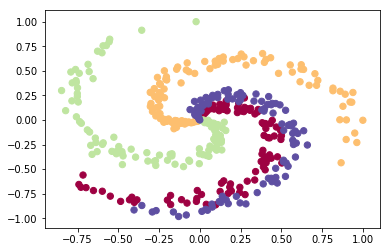

In [7]:
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [0]:
 W=0.01*np.random.randn(D,K)
 b=np.zeros((1,K))

In [0]:
scores=np.dot(X,W)+b

In [0]:
num_examples=X.shape[0]

In [0]:
exp_scores=np.exp(scores)

In [0]:
probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)

In [0]:
correct_logprobs=-np.log(probs[range(num_examples),y])

In [0]:
step_size = 1e-0
reg = 1e-3
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [0]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [0]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W

In [0]:
W += -step_size * dW
b += -step_size * db

In [11]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.386634
iteration 10: loss 1.241615
iteration 20: loss 1.174894
iteration 30: loss 1.140801
iteration 40: loss 1.121791
iteration 50: loss 1.110480
iteration 60: loss 1.103418
iteration 70: loss 1.098849
iteration 80: loss 1.095810
iteration 90: loss 1.093744
iteration 100: loss 1.092316
iteration 110: loss 1.091316
iteration 120: loss 1.090607
iteration 130: loss 1.090100
iteration 140: loss 1.089734
iteration 150: loss 1.089469
iteration 160: loss 1.089275
iteration 170: loss 1.089134
iteration 180: loss 1.089029
iteration 190: loss 1.088952


In [9]:
loss

1.0888993105747307

In [13]:
w = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
step = 1e-0
reg = 1e-3
num_examples = X.shape[0]
for i in range(200):
  score = np.dot(X, w) + b
  exp_score=np.exp(score)
  probs=exp_score/np.sum(exp_score,axis=1,keepdims=True)
  log_probs=-np.log(probs[range(num_examples),y])
  
  data_loss=np.sum(log_probs)/num_examples
  reg_loss=0.5*reg*np.sum(w*w)
  loss=data_loss+reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  dscores=probs
  dscores[range(num_examples),y]-=1
  dscores/=num_examples
  
  dw=np.dot(X.T,dscores)
  db=np.sum(dscores,axis=0,keepdims=True)
  dw+=reg*w
  
  w+=-step*dw
  b+=-step*db 

iteration 0: loss 1.387248
iteration 10: loss 1.241919
iteration 20: loss 1.175042
iteration 30: loss 1.140875
iteration 40: loss 1.121831
iteration 50: loss 1.110502
iteration 60: loss 1.103431
iteration 70: loss 1.098856
iteration 80: loss 1.095814
iteration 90: loss 1.093747
iteration 100: loss 1.092318
iteration 110: loss 1.091317
iteration 120: loss 1.090608
iteration 130: loss 1.090100
iteration 140: loss 1.089734
iteration 150: loss 1.089469
iteration 160: loss 1.089275
iteration 170: loss 1.089134
iteration 180: loss 1.089029
iteration 190: loss 1.088952
